# Uraban Company Anaylasis
- We are going to do EDA on Dataset which we have extracted form urban company website.

In [1]:
#Importing important Libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob

# Importing Dataset
- Importing datset from Directory because after scrapping the data everytime creates a new excel sheet.
- Merging those excel data.

In [2]:
#Getting the list of Exceel files from the directory
path = r"C:\Users\acer\Downloads\urban"
  
# csv files in the path
file_list = glob.glob(path + "/*.xlsx")
excel_list = []
for file in file_list:
    excel_list.append(file)
excel_list

['C:\\Users\\acer\\Downloads\\urban\\dataset.xlsx',
 'C:\\Users\\acer\\Downloads\\urban\\scrapped_data_2022-04-06.xlsx']

In [3]:
l = []
for file in excel_list:
    l.append(pd.read_excel(file))

In [4]:
# Merging all the excel dataset in the directory
df = pd.DataFrame()
df = df.append(l)

In [5]:
df

,Dates,Names,Ratings,Services,City,Counrty,Comments,Unnamed: 0
0,"31 March, 2022",Riddham Desai,5.0,Washing Machine Repair Professionals,Ahmedabad,India,Washing Machine Repair Professionals in Ahmeda...,NaN
1,"31 March, 2022",Abhinav Kushwaha,5.0,None,None,None,None,NaN
2,"31 March, 2022",dola lahiri,5.0,Fridge Repair Service Professionals,Greater Noida,India,Fridge Repair Service Professionals in Greater...,NaN
3,"31 March, 2022",Arunkumar,4.5,None,None,None,None,NaN
4,"31 March, 2022",Divya,4.5,Washing Machine Repair Professionals,Greater Noida,India,Washing Machine Repair Professionals in Greate...,NaN
...,...,...,...,...,...,...,...,...
9725,"6 April, 2022",Manisha,5.0,None,None,None,None,9725.0
9726,"6 April, 2022",Vaibhav,5.0,Beauty Service Professionals,Ghaziabad,India,"Beauty Service Professionals in Ghaziabad, India",9726.0
9727,"6 April, 2022",Satyabrata mohapatra,4.0,AC Service and Repair Professionals,Mumbai,India,"AC Service and Repair Professionals in Mumbai,...",9727.0
9728,"6 April, 2022",Gv rao,5.0,Electricians,Hyderabad,India,"Electricians in Hyderabad, India",9728.0


In [6]:
df.shape

(120672, 8)

In [7]:
for c in df:
    if c == "Unnamed: 0":
        df.drop(["Unnamed: 0"], axis=1, inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120672 entries, 0 to 9729
Data columns (total 7 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Dates     120672 non-null  object 
 1   Names     120672 non-null  object 
 2   Ratings   120672 non-null  float64
 3   Services  120672 non-null  object 
 4   City      120672 non-null  object 
 5   Counrty   120672 non-null  object 
 6   Comments  120672 non-null  object 
dtypes: float64(1), object(6)
memory usage: 7.4+ MB


# Taking care of Null values
- Null values are in the form of "None".
- Replacing them with np.nan.

In [9]:
#Checking for nan values
df.isnull().sum()

Dates       0
Names       0
Ratings     0
Services    0
City        0
Counrty     0
Comments    0
dtype: int64

In [10]:
#Replacing "None" with np.nan
df.replace("None", np.nan, inplace=True)

In [11]:
#Checking nan values
df.isnull().sum()

Dates           0
Names           0
Ratings         0
Services    53982
City        53982
Counrty     53982
Comments    53982
dtype: int64

In [12]:
#Dropping the nan values
df.dropna(inplace=True)

# Taking care of duplicated values.

In [13]:
#Checking counts of duplicates
df.duplicated().sum()

11991

In [14]:
#Dropping Dupilcated rows
df.drop_duplicates(inplace=True)

In [15]:
df.shape

(54699, 7)

In [16]:
df.head()

,Dates,Names,Ratings,Services,City,Counrty,Comments
0,"31 March, 2022",Riddham Desai,5.0,Washing Machine Repair Professionals,Ahmedabad,India,Washing Machine Repair Professionals in Ahmeda...
2,"31 March, 2022",dola lahiri,5.0,Fridge Repair Service Professionals,Greater Noida,India,Fridge Repair Service Professionals in Greater...
4,"31 March, 2022",Divya,4.5,Washing Machine Repair Professionals,Greater Noida,India,Washing Machine Repair Professionals in Greate...
6,"31 March, 2022",SOURABH DASPODDAR,5.0,Wall Painters,Ghaziabad,India,"Wall Painters in Ghaziabad, India"
8,"31 March, 2022",Branavan,4.5,Plumbers,Chennai,India,"Plumbers in Chennai, India"


# Taking care of Ctagorical Features
- converting dates object dtype into Datetime dtype.

In [17]:
#Coverting into Datetime dtype
df["Dates"] = pd.to_datetime(df["Dates"])

In [18]:
df.head()

,Dates,Names,Ratings,Services,City,Counrty,Comments
0,2022-03-31,Riddham Desai,5.0,Washing Machine Repair Professionals,Ahmedabad,India,Washing Machine Repair Professionals in Ahmeda...
2,2022-03-31,dola lahiri,5.0,Fridge Repair Service Professionals,Greater Noida,India,Fridge Repair Service Professionals in Greater...
4,2022-03-31,Divya,4.5,Washing Machine Repair Professionals,Greater Noida,India,Washing Machine Repair Professionals in Greate...
6,2022-03-31,SOURABH DASPODDAR,5.0,Wall Painters,Ghaziabad,India,"Wall Painters in Ghaziabad, India"
8,2022-03-31,Branavan,4.5,Plumbers,Chennai,India,"Plumbers in Chennai, India"


# New Features
- Creating features like Day, month and year from date columns.
- Also Creating Labels/Reviews from Ratings.

In [19]:
# Creating Day, Month and Year Features.
df["Year"] = pd.to_datetime(df["Dates"], format="%Y-%M-%D").dt.year
df["Month"] = pd.to_datetime(df["Dates"], format="%Y-%M-%D").dt.month
df["Day"] = pd.to_datetime(df["Dates"], format="%Y-%M-%D").dt.day

In [20]:
df.head()

,Dates,Names,Ratings,Services,City,Counrty,Comments,Year,Month,Day
0,2022-03-31,Riddham Desai,5.0,Washing Machine Repair Professionals,Ahmedabad,India,Washing Machine Repair Professionals in Ahmeda...,2022,3,31
2,2022-03-31,dola lahiri,5.0,Fridge Repair Service Professionals,Greater Noida,India,Fridge Repair Service Professionals in Greater...,2022,3,31
4,2022-03-31,Divya,4.5,Washing Machine Repair Professionals,Greater Noida,India,Washing Machine Repair Professionals in Greate...,2022,3,31
6,2022-03-31,SOURABH DASPODDAR,5.0,Wall Painters,Ghaziabad,India,"Wall Painters in Ghaziabad, India",2022,3,31
8,2022-03-31,Branavan,4.5,Plumbers,Chennai,India,"Plumbers in Chennai, India",2022,3,31


In [21]:
# Creating a List to store Reviews according to the condintion applied on ratings.
labels = []
for i in df["Ratings"]:
    if i > 3.0:
        labels.append(2)
    elif i == 3.0:
        labels.append(1)
    elif i < 3.0:
        labels.append(0)

In [22]:
#Creating a new columns.
df["Reviews"] = labels

# Dropping Unnecessary features.
- Dropping unnecesary features like dates, names and comments.
- Dates extracted day, month and year.
- Names many catagorical features not required.
- Comments contains sevices names and location which is also in services,city and country columns.

In [23]:
df.drop(["Dates","Names","Comments"],axis=1,inplace=True)

In [24]:
df.head()

,Ratings,Services,City,Counrty,Year,Month,Day,Reviews
0,5.0,Washing Machine Repair Professionals,Ahmedabad,India,2022,3,31,2
2,5.0,Fridge Repair Service Professionals,Greater Noida,India,2022,3,31,2
4,4.5,Washing Machine Repair Professionals,Greater Noida,India,2022,3,31,2
6,5.0,Wall Painters,Ghaziabad,India,2022,3,31,2
8,4.5,Plumbers,Chennai,India,2022,3,31,2


# Some Insights

In [25]:
s = df.groupby("Services")
s.first()

,Ratings,City,Counrty,Year,Month,Day,Reviews
Services,,,,,,,
AC Service and Repair Professionals,5.0,Ahmedabad,India,2022,3,31,2
AC Service and Repairs,1.0,Dubai,United Arab Emirates,2022,3,30,0
Bathroom Cleaning Service Professionals,4.0,Ahmedabad,India,2022,3,29,2
Beauty Service Professionals,5.0,Bangalore,India,2022,3,31,2
Carpenters,5.0,Hyderabad,India,2022,3,31,2
Carpet Cleaning Service Professionals,5.0,Kolkata,India,2022,3,30,2
Chimney and Hob Repair Service Professionals,5.0,Bangalore,India,2022,3,31,2
Cooks,5.0,Bangalore,India,2022,3,30,2
Electricians,5.0,Pune,India,2022,3,31,2


In [26]:
s = df.groupby(["City"])
s.first()

,Ratings,Services,Counrty,Year,Month,Day,Reviews
City,,,,,,,
Ahmedabad,5.0,Washing Machine Repair Professionals,India,2022,3,31,2
Bangalore,5.0,Chimney and Hob Repair Service Professionals,India,2022,3,31,2
Chennai,4.5,Plumbers,India,2022,3,31,2
Dubai,5.0,Part-time Maids,United Arab Emirates,2022,3,31,2
Faridabad,5.0,AC Service and Repair Professionals,India,2022,3,31,2
Ghaziabad,5.0,Wall Painters,India,2022,3,31,2
Greater Noida,5.0,Fridge Repair Service Professionals,India,2022,3,31,2
Gurgaon,5.0,AC Service and Repair Professionals,India,2022,3,31,2
Hyderabad,5.0,AC Service and Repair Professionals,India,2022,3,31,2


In [27]:
s = df.groupby(["City","Services"])
s.first()

Ratings Counrty  \
City      Services                                                              
Ahmedabad AC Service and Repair Professionals                     5.0   India   
          Bathroom Cleaning Service Professionals                 4.0   India   
          Beauty Service Professionals                            5.0   India   
          Carpenters                                              1.0   India   
          Electricians                                            2.5   India   
...                                                               ...     ...   
Thane     Professional Car Cleaning Service Professionals         4.0   India   
          RO and Water Purifier Repair Service Professionals      5.0   India   
          Sofa Cleaning Service Professionals                     5.0   India   
          Wall Painters                                           4.0   India   
          Washing Machine Repair Professionals                    5.0   India   

                                                              Year  Month  \
City      Services                                                          
Ahmedabad AC Service and Repair Professionals                 2022      3   
          Bathroom Cleaning Service Professionals             2022      3   
          Beauty Service Professionals                        2022      3   
          Carpenters                                          2022      3   
          Electricians                                        2022      3   
...                                                            ...    ...   
Thane     Professional Car Cleaning Service Professionals     2022      3   
          RO and Water Purifier Repair Service Professionals  2022      3   
          Sofa Cleaning Service Professionals                 2022      3   
          Wall Painters                                       2022      3   
          Washing Machine Repair Professionals                2022      3   

                                                              Day  Reviews  
City      Services                                                          
Ahmedabad AC Service and Repair Professionals                  31        2  
          Bathroom Cleaning Service Professionals              29        2  
          Beauty Service Professionals                         31        2  
          Carpenters                                           31        0  
          Electricians                                         31        0  
...                                                           ...      ...  
Thane     Professional Car Cleaning Service Professionals       5        2  
          RO and Water Purifier Repair Service Professionals   31        2  
          Sofa Cleaning Service Professionals                  31        2  
          Wall Painters                                        30        2  
          Washing Machine Repair Professionals                 31        2  

[291 rows x 6 columns]

In [28]:
pd.crosstab(df['Reviews'], df['Services'])

Services,AC Service and Repair Professionals,AC Service and Repairs,Bathroom Cleaning Service Professionals,Beauty Service Professionals,Carpenters,Carpet Cleaning Service Professionals,Chimney and Hob Repair Service Professionals,Cooks,Electricians,Fridge Repair Service Professionals,...,Party Make-up Artists,Pest Control Services,Plumbers,Professional Car Cleaning Service Professionals,RO and Water Purifier Repair Service Professionals,Sofa Cleaning Service Professionals,Spa at Home for Women,TV Repair Service Professionals,Wall Painters,Washing Machine Repair Professionals
Reviews,,,,,,,,,,,,,,,,,,,,,
0,510,1,10,218,103,0,13,0,73,25,...,2,19,112,5,37,29,3,10,13,32
1,219,0,0,127,45,0,7,0,30,13,...,1,4,45,2,13,17,2,8,3,13
2,21883,5,120,7169,3398,13,428,23,3013,1186,...,59,867,3082,80,1444,1433,164,563,248,1844


In [29]:
df["Services"].value_counts()

AC Service and Repair Professionals                   22612
Beauty Service Professionals                           7514
Carpenters                                             3546
Plumbers                                               3239
Electricians                                           3116
Massage Therapists At Home For Women                   1931
Washing Machine Repair Professionals                   1889
Home Cleaning Service Professionals                    1527
RO and Water Purifier Repair Service Professionals     1494
Sofa Cleaning Service Professionals                    1479
Fridge Repair Service Professionals                    1224
Pest Control Services                                   890
Massage Therapists At Home For Men                      670
Geyser Repair Professionals                             624
Part-time Maids                                         609
TV Repair Service Professionals                         581
Microwave Repair Professionals          

In [30]:
df["City"].value_counts()

Hyderabad        8467
Bangalore        8003
Mumbai           6311
New Delhi        6218
Kolkata          4895
Chennai          4448
Pune             3796
Gurgaon          2677
Noida            2031
Ahmedabad        1915
Thane            1449
Ghaziabad        1402
Secunderabad     1282
Dubai             669
Greater Noida     602
Faridabad         534
Name: City, dtype: int64

In [31]:
df["Counrty"].value_counts()

India                   54030
United Arab Emirates      669
Name: Counrty, dtype: int64

In [32]:
df["Reviews"].value_counts()

2    52695
0     1360
1      644
Name: Reviews, dtype: int64

# Visulization

C:\Users\acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Ratings', ylabel='count'>

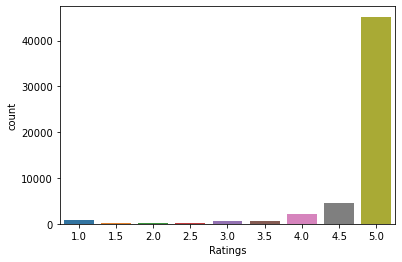

In [33]:
#Countplot on ratings
sns.countplot(df["Ratings"])

C:\Users\acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Reviews', ylabel='count'>

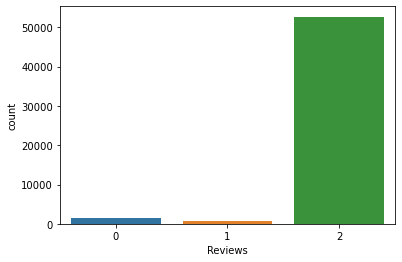

In [34]:
# Countplo on reviews
sns.countplot(df["Reviews"])

C:\Users\acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Ratings', ylabel='Services'>

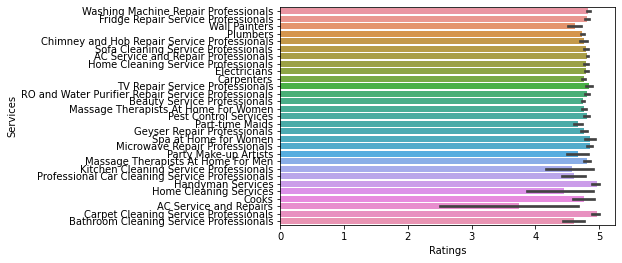

In [35]:
# Barplot on services with Ratings
sns.barplot(df["Ratings"], df["Services"])

C:\Users\acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Ratings', ylabel='City'>

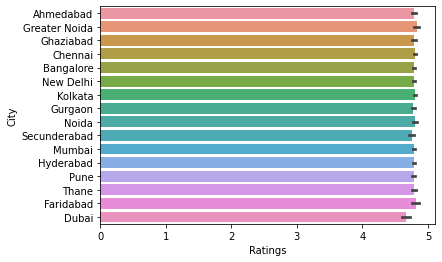

In [36]:
# Barplot on city with Ratings
sns.barplot(df["Ratings"], df["City"])

C:\Users\acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Reviews', ylabel='count'>

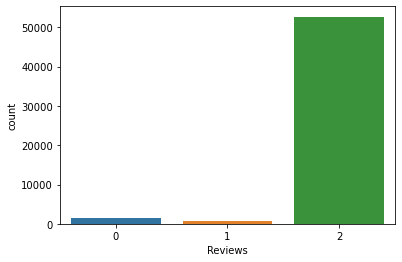

In [37]:
#Countplot on reviews
sns.countplot(df["Reviews"])

<AxesSubplot:ylabel='Ratings'>

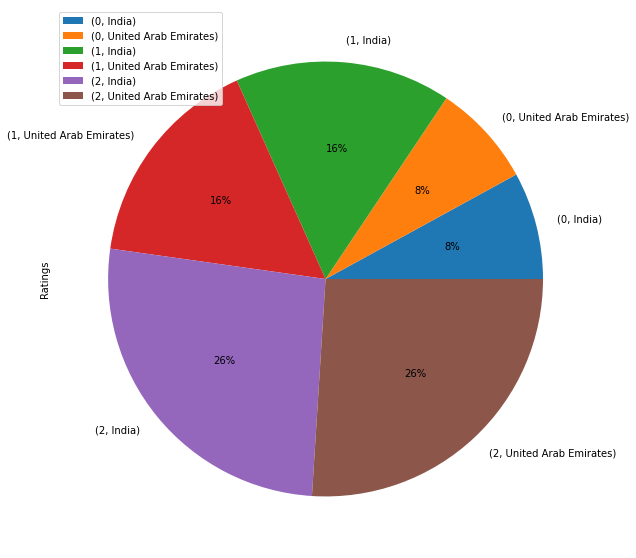

In [38]:
df.groupby(['Reviews', 'Counrty']).mean().plot(kind='pie', y='Ratings',figsize=(10,10), autopct='%1.0f%%')

<AxesSubplot:xlabel='Reviews'>

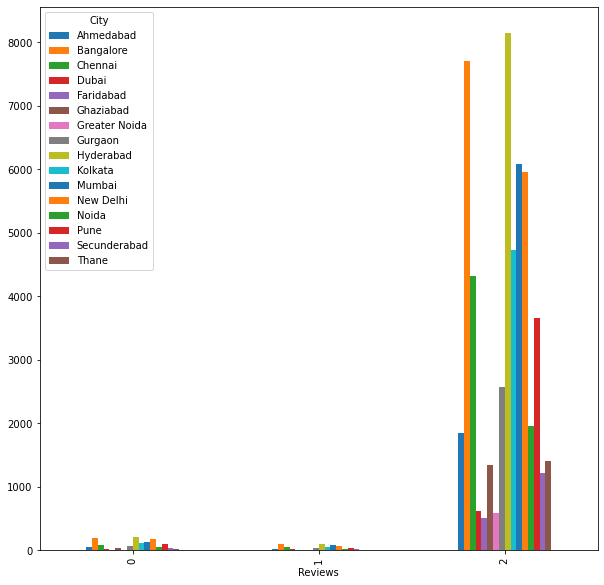

In [39]:
review_table= pd.crosstab(index=df.Reviews,columns=df['City'])
review_table.plot(kind="bar",figsize=(10,10), stacked=False)